regression analysis Pib-Percapita, Populacao, taxa de analfabetismo, quantidade de pessoas no bolsa familia, UF -2021
votos - 2022

In [72]:
import pandas as pd

# criando o df

In [73]:
bolsa_familia = pd.read_csv('..\\misocial.csv', encoding='latin1')
votos_centrao = pd.read_csv('..\\Eleicao 2022\\votacoes_centrao.csv')
eleicoes_total = pd.read_csv('..\\Eleicao 2022\\eleitos_2022.csv')
analfabetismo = pd.read_csv('..\\taxa de analfabetismo\\analfabetismo.csv')

In [149]:
pib_municipios = pd.read_excel('PIB dos Municípios - base de dados 2010-2021.xlsx')
pib_2 = pd.read_excel('PIB dos Municípios - base de dados 2002-2009.xls')

In [150]:
pib_municipios = pd.concat([pib_municipios, pib_2])

In [74]:
votos_centrao.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'CD_SITUACAO_CANDIDATURA',
       'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND',
       'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'ST_VOTO_EM_TRANSITO', 'QT_VOTOS_NOMINAIS',
       'NM_TIPO_DESTINACAO_VOTOS', 'QT_VOTOS_NOMINAIS_VALIDOS',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [75]:
votos_centrao_por_municipio = pd.pivot_table(votos_centrao, index='CD_MUNICIPIO', columns='NM_CANDIDATO', values='QT_VOTOS_NOMINAIS', aggfunc='sum', fill_value=0)
total = eleicoes_total.groupby('CD_MUNICIPIO')['QT_VOTOS_NOMINAIS'].sum()
votos_centrao_soma = votos_centrao_por_municipio.sum(axis=1)
percentage_votos_centrao = (votos_centrao_soma / total)
pib_2021 = pib_municipios[pib_municipios['Ano']==2021]

In [77]:
populacao = pib_2021['Produto Interno Bruto, \na preços correntes\n(R$ 1.000)'] / pib_2021['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']* 1000


In [79]:

regress_data = pib_2021[['Nome da Grande Região','Código do Município', 'Nome do Município', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)', 'Sigla da Unidade da Federação']]
regress_data = regress_data.rename(columns={'Código do Município':'ibge', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'pib_per_capita', 'Nome da Grande Região':'regiao', 'Nome do Município':'municipio', 'Sigla da Unidade da Federação':'uf'})
regress_data.sort_index()
regress_data['populacao'] = populacao

In [80]:
ibg_ana = regress_data[['ibge', 'municipio', 'uf']].sort_values(['municipio', 'uf'])

In [81]:
analfabetismo.sort_values(['Municipio', "UF"])
analfabetismo.set_index(['Municipio', 'UF'])


,,Total
Municipio,UF,
Acrelândia,AC,88.35
Assis Brasil,AC,85.30
Brasiléia,AC,89.01
Bujari,AC,81.26
Capixaba,AC,84.27
...,...,...
Tocantinópolis,TO,90.04
Tupirama,TO,87.97
Tupiratins,TO,84.89


In [83]:
analfabetismo = analfabetismo.merge(ibg_ana, left_on=['Municipio', 'UF'], right_on=['municipio', 'uf'])

In [85]:
analfabetismo = analfabetismo[['ibge', 'Total']]

In [87]:
regress_data = regress_data.merge(analfabetismo, left_on='ibge', right_on='ibge')
regress_data = regress_data.rename(columns={'Total':'taxa_analfabetismo'})
regress_data['taxa_analfabetismo'] = 100 - regress_data['taxa_analfabetismo']

In [90]:
bolsa_familia = bolsa_familia.pivot_table(index='ibge', values='qtd_familias_beneficiarias_bolsa_familia', aggfunc='sum')
bolsa_familia['ibge'] = bolsa_familia.index.astype(int)

In [91]:
regress_data['ibge'] = regress_data['ibge'].astype(int)
regress_data.dtypes


regiao                 object
ibge                    int32
municipio              object
pib_per_capita        float64
uf                     object
populacao             float64
taxa_analfabetismo    float64
dtype: object

In [94]:
unique_cds = votos_centrao.drop_duplicates('CD_MUNICIPIO')[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF']]
unique_cds

,CD_MUNICIPIO,NM_MUNICIPIO,SG_UF
0,1511,PLÁCIDO DE CASTRO,AC
1,1090,MÂNCIO LIMA,AC
2,1031,SANTA ROSA DO PURUS,AC
3,1120,ACRELÂNDIA,AC
4,1490,XAPURI,AC
...,...,...,...
83271,73083,PALMEIRANTE,TO
83274,92606,SANTA TEREZA DO TOCANTINS,TO
83275,73601,LAVANDEIRA,TO
83287,73105,SÃO FÉLIX DO TOCANTINS,TO


In [95]:
percentage_votos_centrao = pd.DataFrame(percentage_votos_centrao)
percentage_votos_centrao = percentage_votos_centrao.rename(columns={0:'percentage_votos_centrao'})
percentage_votos_centrao = percentage_votos_centrao.merge(unique_cds, left_index=True, right_on='CD_MUNICIPIO')

In [97]:
import unidecode
ibg_ana['municipio'] = ibg_ana['municipio'].str.upper()
ibg_ana['municpio'] = ibg_ana['municipio'].apply(unidecode.unidecode)

In [155]:
ibg_ana

,ibge,municipio,uf
66578,5200050,ABADIA DE GOIÁS,GO
63499,3100104,ABADIA DOS DOURADOS,MG
66579,5200100,ABADIÂNIA,GO
61406,1500107,ABAETETUBA,PA
63500,3100203,ABAETÉ,MG
...,...,...,...
65889,4301552,ÁUREA,RS
65180,4101150,ÂNGULO,PR
63087,2900504,ÉRICO CARDOSO,BA
61487,1505106,ÓBIDOS,PA


In [98]:
percentage_votos_centrao = percentage_votos_centrao.merge(ibg_ana, left_on=['NM_MUNICIPIO', 'SG_UF'], right_on=['municipio', 'uf'], how='right')

In [99]:
percentage_votos_centrao.isna().sum()

percentage_votos_centrao    66
CD_MUNICIPIO                66
NM_MUNICIPIO                66
SG_UF                       66
ibge                         0
municipio                    0
uf                           0
dtype: int64

In [100]:
percentage_votos_centrao = percentage_votos_centrao[['percentage_votos_centrao', 'ibge']]

In [102]:
regress_data = regress_data.merge(percentage_votos_centrao, on='ibge')

In [103]:
regress_data_2020  = regress_data

,regiao,ibge,municipio,pib_per_capita,uf,populacao,taxa_analfabetismo,percentage_votos_centrao
0,Norte,1100015,Alta Floresta D'Oeste,32619.88,RO,2.251600e+04,8.41,NaN
1,Norte,1100023,Ariquemes,28878.27,RO,1.111480e+05,5.92,0.746897
2,Norte,1100031,Cabixi,47051.83,RO,5.067000e+03,10.18,0.368494
3,Norte,1100049,Cacoal,32313.26,RO,8.641600e+04,6.29,0.125420
4,Norte,1100056,Cerejeiras,46185.81,RO,1.608800e+04,7.85,0.259368
...,...,...,...,...,...,...,...,...
5564,Centro-oeste,5222005,Vianópolis,60900.61,GO,1.408800e+04,6.55,0.719274
5565,Centro-oeste,5222054,Vicentinópolis,53340.72,GO,9.002000e+03,9.13,0.591141
5566,Centro-oeste,5222203,Vila Boa,27886.97,GO,6.451000e+03,12.83,0.263485
5567,Centro-oeste,5222302,Vila Propício,51845.31,GO,5.941000e+03,14.32,0.585609


In [104]:
pd.get_dummies(regress_data['uf'], dtype=int)

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5567,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
regress_analy = pd.concat([regress_data[['pib_per_capita', 'taxa_analfabetismo', 'percentage_votos_centrao', 'populacao']], pd.get_dummies(regress_data['uf'], dtype=int)], axis=1)

In [108]:
regress_analy

,pib_per_capita,taxa_analfabetismo,percentage_votos_centrao,populacao,AC,AL,AM,AP,BA,CE,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,32619.88,8.41,NaN,2.251600e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,28878.27,5.92,0.746897,1.111480e+05,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,47051.83,10.18,0.368494,5.067000e+03,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,32313.26,6.29,0.125420,8.641600e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,46185.81,7.85,0.259368,1.608800e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,60900.61,6.55,0.719274,1.408800e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,53340.72,9.13,0.591141,9.002000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,27886.97,12.83,0.263485,6.451000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,51845.31,14.32,0.585609,5.941000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
centrao_votos_2002 = pd.read_csv('..\\Eleicoes\\indice_centrao_2002.csv', usecols=[1,2,3])
centrao_votos_2006 = pd.read_csv('..\\Eleicoes\\indice_centrao_2006.csv', usecols=[1,2,3])
centrao_votos_2010 = pd.read_csv('..\\Eleicoes\\indice_centrao_2010.csv', usecols=[1,2,3])
centrao_votos_2014 = pd.read_csv('..\\Eleicoes\\indice_centrao_2014.csv', usecols=[1,2,3])
centrao_votos_2018 = pd.read_csv('..\\Eleicoes\\indice_centrao_2018.csv', usecols=[1,2,3])

In [145]:
taxa_analfa_2002 = pd.read_csv('..\\taxa de analfabetismo\\2000\\analfa_2000.csv')
taxa_analfa_2010 = pd.read_csv('..\\taxa de analfabetismo\\2010\\analfa_2010.csv') 

In [151]:
pib_2002 = pib_municipios[pib_municipios['Ano']==2002]
pib_2006 = pib_municipios[pib_municipios['Ano']==2006]
pib_2010 = pib_municipios[pib_municipios['Ano']==2010]
pib_2014 = pib_municipios[pib_municipios['Ano']==2014]
pib_2018 = pib_municipios[pib_municipios['Ano']==2018]

In [252]:
regress_data_2002 = pib_2002[['Nome da Grande Região','Código do Município', 'Nome do Município', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)', 'Sigla da Unidade da Federação']]
regress_data_2002 = regress_data_2002.rename(columns={'Código do Município':'ibge', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'pib_per_capita', 'Nome da Grande Região':'regiao', 'Nome do Município':'municipio', 'Sigla da Unidade da Federação':'uf'})
regress_data_2002['municipio'] = regress_data_2002['municipio'].apply(unidecode.unidecode)
regress_data_2002['municipio'] = regress_data_2002['municipio'].str.upper()
regress_data_2002 = centrao_votos_2002.merge(regress_data_2002, left_on=['nm_municipio', 'sg_uf'], right_on=['municipio', 'uf'], how='right')
regress_data_2002.drop(columns=['nm_municipio', 'sg_uf'], inplace=True)

In [230]:
regress_data_2002

,regiao,ibge,municipio,pib_per_capita,uf
0,Norte,1100015,ALTA FLORESTA D'OESTE,4047.83,RO
1,Norte,1100023,ARIQUEMES,5667.37,RO
2,Norte,1100031,CABIXI,4246.99,RO
3,Norte,1100049,CACOAL,6353.27,RO
4,Norte,1100056,CEREJEIRAS,4442.47,RO
...,...,...,...,...,...
5555,Centro-oeste,5222005,VIANOPOLIS,7243.69,GO
5556,Centro-oeste,5222054,VICENTINOPOLIS,10636.37,GO
5557,Centro-oeste,5222203,VILA BOA,4047.04,GO
5558,Centro-oeste,5222302,VILA PROPICIO,9820.04,GO


In [231]:
taxa_analfa_2002

,Município,Taxa de analfabetismo,ibge
0,ALTA FLORESTA D'OESTE,"14,8",110001
1,ARIQUEMES,"11,1",110002
2,CABIXI,"16,8",110003
3,CACOAL,"11,5",110004
4,CEREJEIRAS,"12,4",110005
...,...,...,...
5502,VIANOPOLIS,"12,3",522200
5503,VICENTINOPOLIS,"16,5",522205
5504,VILA BOA,"26,1",522220
5505,VILA PROPICIO,"26,8",522230


In [253]:
regress_data_2002 = regress_data_2002.merge(taxa_analfa_2002, left_on='municipio', right_on='Município', left_index=False, right_index=False)

In [254]:
regress_data_2002

,0,regiao,ibge_x,municipio,pib_per_capita,uf,Município,Taxa de analfabetismo,ibge_y
0,NaN,Norte,1100015,ALTA FLORESTA D'OESTE,4047.83,RO,ALTA FLORESTA D'OESTE,"14,8",110001
1,0.058461,Norte,1100023,ARIQUEMES,5667.37,RO,ARIQUEMES,"11,1",110002
2,0.037951,Norte,1100031,CABIXI,4246.99,RO,CABIXI,"16,8",110003
3,0.511934,Norte,1100049,CACOAL,6353.27,RO,CACOAL,"11,5",110004
4,0.043358,Norte,1100056,CEREJEIRAS,4442.47,RO,CEREJEIRAS,"12,4",110005
...,...,...,...,...,...,...,...,...,...
6149,0.402030,Centro-oeste,5222005,VIANOPOLIS,7243.69,GO,VIANOPOLIS,"12,3",522200
6150,0.038159,Centro-oeste,5222054,VICENTINOPOLIS,10636.37,GO,VICENTINOPOLIS,"16,5",522205
6151,0.007164,Centro-oeste,5222203,VILA BOA,4047.04,GO,VILA BOA,"26,1",522220
6152,0.257369,Centro-oeste,5222302,VILA PROPICIO,9820.04,GO,VILA PROPICIO,"26,8",522230


---------------------------------------------------------------------------------------------------

# Analysis

In [111]:
regress_analy.drop(columns='percentage_votos_centrao')

,pib_per_capita,taxa_analfabetismo,populacao,AC,AL,AM,AP,BA,CE,DF,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,32619.88,8.41,2.251600e+04,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,28878.27,5.92,1.111480e+05,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,47051.83,10.18,5.067000e+03,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,32313.26,6.29,8.641600e+04,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,46185.81,7.85,1.608800e+04,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,60900.61,6.55,1.408800e+04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,53340.72,9.13,9.002000e+03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,27886.97,12.83,6.451000e+03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,51845.31,14.32,5.941000e+03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
regress_analy

,pib_per_capita,taxa_analfabetismo,percentage_votos_centrao,populacao,AC,AL,AM,AP,BA,CE,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
1,28878.27,5.92,0.746897,1.111480e+05,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,47051.83,10.18,0.368494,5.067000e+03,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,32313.26,6.29,0.125420,8.641600e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,46185.81,7.85,0.259368,1.608800e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,27923.92,9.53,0.409134,1.521300e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,60900.61,6.55,0.719274,1.408800e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,53340.72,9.13,0.591141,9.002000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,27886.97,12.83,0.263485,6.451000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,51845.31,14.32,0.585609,5.941000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

# Add a constant column to X
X_with_constant = sm.add_constant(regress_analy[['pib_per_capita', 'taxa_analfabetismo', 'populacao']])

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X_with_constant.columns
vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Display the VIF values
print(vif)

             Variable       VIF
0               const  5.740573
1      pib_per_capita  1.154778
2  taxa_analfabetismo  1.166296
3           populacao  1.011164


In [129]:
regress_analy = regress_data[['pib_per_capita', 'taxa_analfabetismo', 'percentage_votos_centrao', 'populacao']].dropna()
X = regress_analy[['pib_per_capita', 'taxa_analfabetismo', 'populacao']]
y = regress_analy['percentage_votos_centrao']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     percentage_votos_centrao   R-squared:                       0.071
Model:                                  OLS   Adj. R-squared:                  0.071
Method:                       Least Squares   F-statistic:                     141.1
Date:                      Fri, 28 Jun 2024   Prob (F-statistic):           4.72e-88
Time:                              09:33:11   Log-Likelihood:                 111.43
No. Observations:                      5503   AIC:                            -214.9
Df Residuals:                          5499   BIC:                            -188.4
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

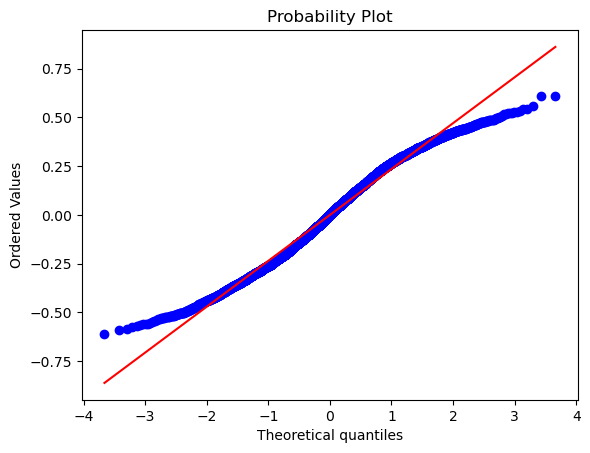

In [130]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist="norm", plot=plt)
plt.show()

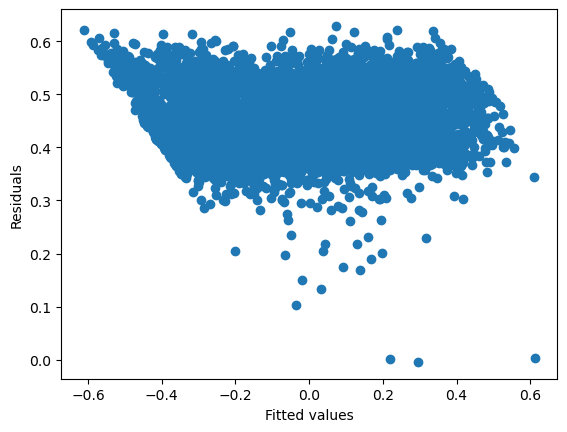

In [132]:
plt.scatter( model.resid, model.fittedvalues,)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


In [134]:
from statsmodels.robust.norms import HuberT

model_robust = sm.RLM(y, X, M=HuberT())
results_robust = model_robust.fit()

print(results_robust.summary())

                       Robust linear Model Regression Results                       
Dep. Variable:     percentage_votos_centrao   No. Observations:                 5503
Model:                                  RLM   Df Residuals:                     5499
Method:                                IRLS   Df Model:                            3
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Fri, 28 Jun 2024                                         
Time:                              10:00:11                                         
No. Iterations:                          14                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

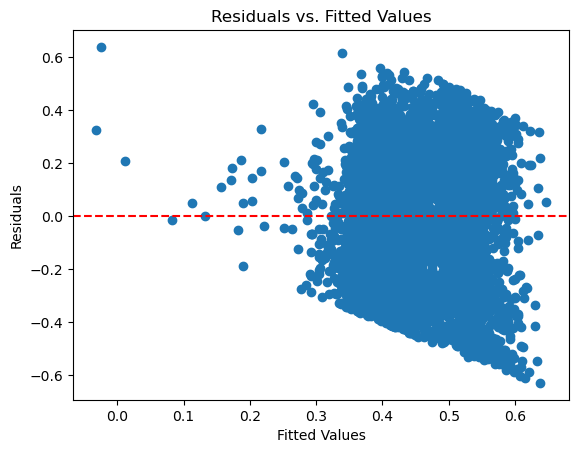

In [136]:
import matplotlib.pyplot as plt
rlm_results = results_robust
# Assuming you have the fitted values and residuals from your RLM model
fitted_values = rlm_results.fittedvalues
residuals = rlm_results.resid

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

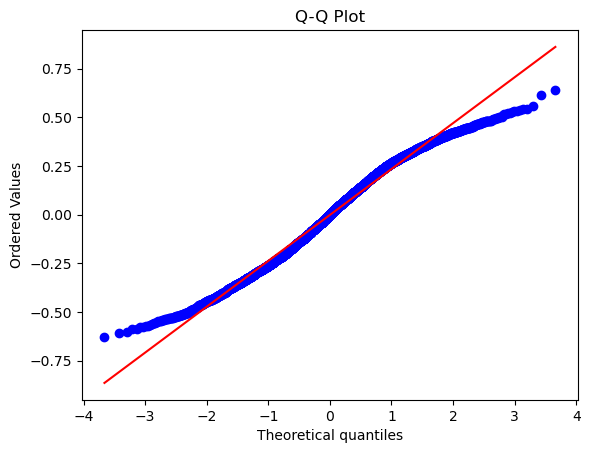

In [137]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [139]:
import numpy as np
X_transformed = np.log(X + 1)
y_transformed = np.log(y + 1)  # Adding 1 to avoid log(0)
model_transformed = sm.RLM(y_transformed, X_transformed, M=sm.robust.norms.HuberT()).fit()
print(model_transformed.summary())


                       Robust linear Model Regression Results                       
Dep. Variable:     percentage_votos_centrao   No. Observations:                 5503
Model:                                  RLM   Df Residuals:                     5499
Method:                                IRLS   Df Model:                            3
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Fri, 28 Jun 2024                                         
Time:                              10:19:07                                         
No. Iterations:                          18                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

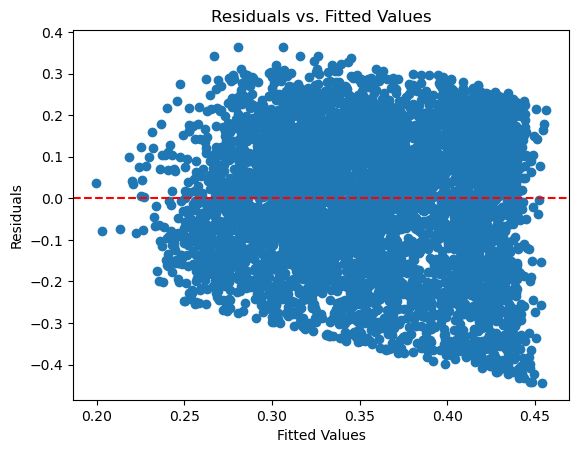

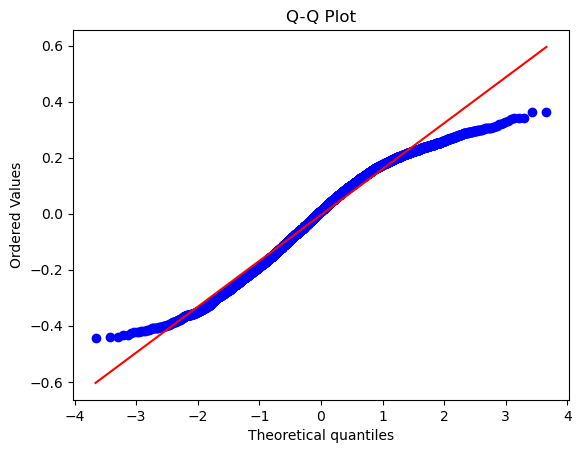

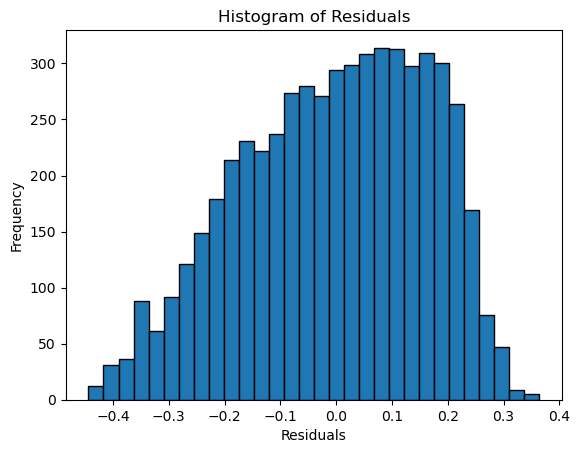

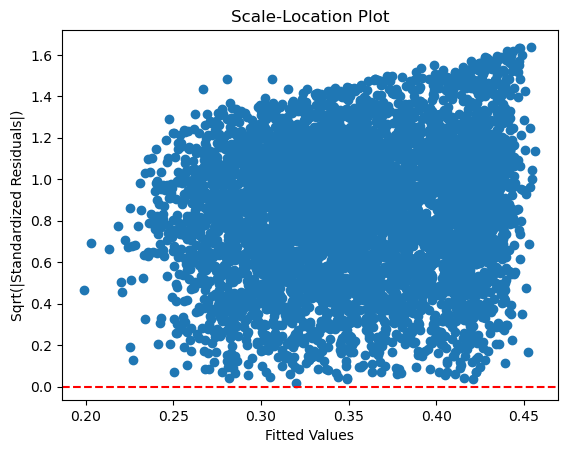

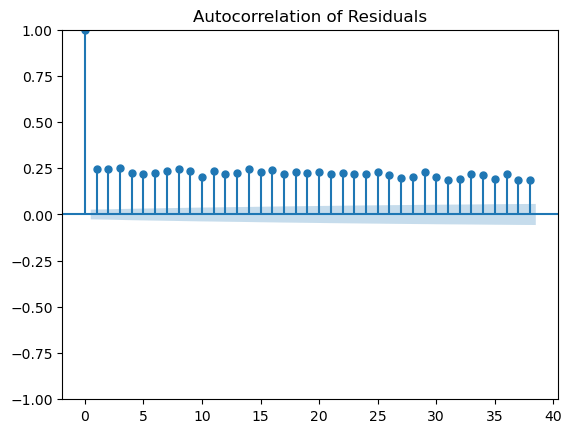

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.regressionplots import plot_leverage_resid2
rlm_results = model_transformed
# Assuming rlm_results is your fitted RLM model
fitted_values = rlm_results.fittedvalues
residuals = rlm_results.resid
standardized_residuals = residuals / np.std(residuals)
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

# Residuals vs. Fitted Values
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Histogram of Residuals
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Scale-Location Plot
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(|Standardized Residuals|)')
plt.title('Scale-Location Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()



# Autocorrelation Plot
plot_acf(residuals)
plt.title('Autocorrelation of Residuals')
plt.show()


In [127]:
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT
from sklearn.preprocessing import StandardScaler

# Create the X and y variables for the regression
X = regress_analy[['pib_per_capita', 'taxa_analfabetismo', 'populacao']]
y = regress_analy['percentage_votos_centrao']
# Normalize X
scaler = StandardScaler()
X_normalized = sm.add_constant(scaler.fit_transform(X))


# Fit the regression model
model_robust = sm.RLM(y, X_normalized, M=HuberT())
results = model_robust.fit()

# Print the regression results
print(results.summary())

                       Robust linear Model Regression Results                       
Dep. Variable:     percentage_votos_centrao   No. Observations:                 5503
Model:                                  RLM   Df Residuals:                     5499
Method:                                IRLS   Df Model:                            3
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Wed, 26 Jun 2024                                         
Time:                              15:58:36                                         
No. Iterations:                          14                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [143]:
# Breusch-Pagan Test for heteroscedasticity
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(residuals, rlm_results.model.exog)
print(f'Lagrange multiplier statistic: {test[0]}, p-value: {test[1]}')

# Durbin-Watson Test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# Jarque-Bera Test for normality
from scipy.stats import jarque_bera
jb_stat, jb_p_value = jarque_bera(residuals)
print(f'Jarque-Bera statistic: {jb_stat}, p-value: {jb_p_value}')

Lagrange multiplier statistic: 339.0673611959829, p-value: 3.473891945124928e-73
Durbin-Watson statistic: 1.5016739165487012
Jarque-Bera statistic: 209.3340978339233, p-value: 3.496859782494418e-46


In [9]:
import pandas as pd

ideb = pd.read_excel("divulgacao_ensino_medio_municipios_2023\divulgacao_ensino_medio_municipios_2023\divulgacao_ensino_medio_municipios_2023.xlsx", skiprows=7, skipfooter=12)
votos_centrao = pd.read_csv("regress2022_dados.csv")



In [4]:
ideb

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Nota Média Padronizada (N).2,Matemática.3,Língua Portuguesa.3,Nota Média Padronizada (N).3,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,NaN,NaN,NaN,NaN,Total,1ª série,2ª série,3ª série,4ª série,Indicador de Rendimento (P),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2021
1,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2017_SI_4,VL_APROVACAO_2017_1,VL_APROVACAO_2017_2,VL_APROVACAO_2017_3,VL_APROVACAO_2017_4,VL_INDICADOR_REND_2017,...,VL_NOTA_MEDIA_2021,VL_NOTA_MATEMATICA_2023,VL_NOTA_PORTUGUES_2023,VL_NOTA_MEDIA_2023,VL_OBSERVADO_2017,VL_OBSERVADO_2019,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2019,VL_PROJECAO_2021
2,RO,1100015,Alta Floresta D'Oeste,Estadual,88.1,85,90.4,90.4,-,0.885253,...,4.326666,274.69,273.68,4.644526,3.9,4.5,3.9,4.5,4.1,4.3
3,RO,1100015,Alta Floresta D'Oeste,Pública,88.1,85,90.4,90.4,-,0.885253,...,4.326666,274.69,273.68,4.644526,3.9,4.5,3.9,4.5,4.1,4.3
4,RO,1100023,Ariquemes,Estadual,82.6,77.9,83,91.7,-,0.838216,...,4.437153,269.37,271.11,4.531334,3.8,3.9,4.1,4.1,4,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11720,DF,5300108,Brasília,Estadual,78.3,70.9,81.8,85.7,-,0.789517,...,4.694515,263.1,269.41,4.417823,3.4,4,4,3.7,3.6,3.8
11721,DF,5300108,Brasília,Federal,87.2,80.9,92,94.6,-,0.887539,...,-,314.4,302.83,5.638628,5.3,-,-,5.1,5.5,5.7
11722,DF,5300108,Brasília,Pública,78.5,71.2,82.1,85.8,-,0.79197,...,4.736,265.3,270.84,4.470129,3.4,4,4,3.8,3.7,3.9
11723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(ideb):
    # Select columns: 'Unnamed: 0', 'Unnamed: 1' and 4 other columns
    ideb = ideb.loc[:, ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Nota Média Padronizada (N).3', 'Unnamed: 43', 'Unnamed: 42', 'Unnamed: 41', 'Unnamed: 40', 'Nota Média Padronizada (N).2', 'Nota Média Padronizada (N).1', 'Nota Média Padronizada (N)']]
    return ideb

ideb_clean = clean_data(ideb.copy())
ideb_clean.columns = ideb_clean.iloc[1]
ideb_clean = ideb_clean.iloc[2:-2]
ideb_clean.head()

1,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_NOTA_MEDIA_2023,VL_OBSERVADO_2023,VL_OBSERVADO_2021,VL_OBSERVADO_2019,VL_OBSERVADO_2017,VL_NOTA_MEDIA_2021,VL_NOTA_MEDIA_2019,VL_NOTA_MEDIA_2017
2,RO,1100015,Alta Floresta D'Oeste,Estadual,4.644526,4.5,3.9,4.5,3.9,4.326666,4.863751,4.379528
3,RO,1100015,Alta Floresta D'Oeste,Pública,4.644526,4.5,3.9,4.5,3.9,4.326666,4.863751,4.379528
4,RO,1100023,Ariquemes,Estadual,4.531334,4.1,4.1,3.9,3.8,4.437153,4.72569,4.47829
5,RO,1100023,Ariquemes,Federal,-,-,-,-,-,-,-,-
6,RO,1100023,Ariquemes,Pública,4.620059,4.2,3.9,4,3.8,4.437153,4.775508,4.49116


In [94]:
ideb_clean['VL_OBSERVADO_2023'] = ideb_clean['VL_OBSERVADO_2023'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_NOTA_MEDIA_2023'] = ideb_clean['VL_NOTA_MEDIA_2023'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_OBSERVADO_2021'] = ideb_clean['VL_OBSERVADO_2021'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_NOTA_MEDIA_2021'] = ideb_clean['VL_NOTA_MEDIA_2021'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_OBSERVADO_2019'] = ideb_clean['VL_OBSERVADO_2019'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_NOTA_MEDIA_2019'] = ideb_clean['VL_NOTA_MEDIA_2019'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_OBSERVADO_2017'] = ideb_clean['VL_OBSERVADO_2017'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_NOTA_MEDIA_2017'] = ideb_clean['VL_NOTA_MEDIA_2017'].replace("-", "Nan").astype(float, errors='ignore')


ideb_clean

1,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_NOTA_MEDIA_2023,VL_OBSERVADO_2023,VL_OBSERVADO_2021,VL_OBSERVADO_2019,VL_OBSERVADO_2017,VL_NOTA_MEDIA_2021,VL_NOTA_MEDIA_2019,VL_NOTA_MEDIA_2017
2,RO,1100015,Alta Floresta D'Oeste,Estadual,4.644526,4.5,3.9,4.5,3.9,4.326666,4.863751,4.379528
3,RO,1100015,Alta Floresta D'Oeste,Pública,4.644526,4.5,3.9,4.5,3.9,4.326666,4.863751,4.379528
4,RO,1100023,Ariquemes,Estadual,4.531334,4.1,4.1,3.9,3.8,4.437153,4.725690,4.478290
5,RO,1100023,Ariquemes,Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,RO,1100023,Ariquemes,Pública,4.620059,4.2,3.9,4.0,3.8,4.437153,4.775508,4.491160
...,...,...,...,...,...,...,...,...,...,...,...,...
11718,GO,5222302,Vila Propício,Estadual,4.437978,4.4,4.6,4.4,4.5,4.629550,4.520494,4.549669
11719,GO,5222302,Vila Propício,Pública,4.437978,4.4,4.6,4.4,4.5,4.629550,4.520494,4.549669
11720,DF,5300108,Brasília,Estadual,4.417823,3.7,4.0,4.0,3.4,4.694515,4.757562,4.319077
11721,DF,5300108,Brasília,Federal,5.638628,5.1,NaN,NaN,5.3,NaN,NaN,6.010421


In [95]:
ideb_clean = ideb_clean.reset_index(drop=True)

## Publica IDEB

In [96]:
ideb_clean_pub = ideb_clean[ideb_clean['REDE'] == 'Pública']
merged_ideb = votos_centrao.merge(ideb_clean_pub, left_on='ibge', right_on='CO_MUNICIPIO')

In [97]:
merged_ideb

,Unnamed: 0,regiao,ibge,municipio,pib_per_capita,uf,vab,Impostos,populacao,taxa_analfabetismo,...,NO_MUNICIPIO,REDE,VL_NOTA_MEDIA_2023,VL_OBSERVADO_2023,VL_OBSERVADO_2021,VL_OBSERVADO_2019,VL_OBSERVADO_2017,VL_NOTA_MEDIA_2021,VL_NOTA_MEDIA_2019,VL_NOTA_MEDIA_2017
0,0,Norte,1100015,Alta Floresta D'Oeste,32619.88,RO,"Administração, defesa, educação e saúde públic...",4.959640e+04,2.251600e+04,8.41,...,Alta Floresta D'Oeste,Pública,4.644526,4.5,3.9,4.5,3.9,4.326666,4.863751,4.379528
1,1,Norte,1100023,Ariquemes,28878.27,RO,Demais serviços,4.201954e+05,1.111480e+05,5.92,...,Ariquemes,Pública,4.620059,4.2,3.9,4.0,3.8,4.437153,4.775508,4.491160
2,2,Norte,1100031,Cabixi,47051.83,RO,"Agricultura, inclusive apoio à agricultura e a...",1.119268e+04,5.067000e+03,10.18,...,Cabixi,Pública,4.212595,4.1,4.1,NaN,3.7,4.283235,NaN,3.862733
3,3,Norte,1100049,Cacoal,32313.26,RO,Demais serviços,3.846066e+05,8.641600e+04,6.29,...,Cacoal,Pública,4.507969,4.2,4.2,4.4,3.9,4.508396,4.831159,4.250359
4,4,Norte,1100056,Cerejeiras,46185.81,RO,Comércio e reparação de veículos automotores e...,1.319039e+05,1.608800e+04,7.85,...,Cerejeiras,Pública,4.635988,4.1,NaN,4.6,3.8,NaN,4.986536,4.698697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,5564,Centro-oeste,5222005,Vianópolis,60900.61,GO,"Agricultura, inclusive apoio à agricultura e a...",6.605620e+04,1.408800e+04,6.55,...,Vianópolis,Pública,5.145802,5.1,4.5,5.4,4.7,4.667125,5.574786,5.027023
5554,5565,Centro-oeste,5222054,Vicentinópolis,53340.72,GO,"Agricultura, inclusive apoio à agricultura e a...",3.189978e+04,9.002000e+03,9.13,...,Vicentinópolis,Pública,4.742368,4.7,4.6,5.1,4.9,4.599633,5.153322,4.968629
5555,5566,Centro-oeste,5222203,Vila Boa,27886.97,GO,"Agricultura, inclusive apoio à agricultura e a...",1.419232e+04,6.451000e+03,12.83,...,Vila Boa,Pública,4.872678,4.9,4.0,4.2,3.7,3.996643,4.241835,3.819199
5556,5567,Centro-oeste,5222302,Vila Propício,51845.31,GO,"Agricultura, inclusive apoio à agricultura e a...",1.286475e+04,5.941000e+03,14.32,...,Vila Propício,Pública,4.437978,4.4,4.6,4.4,4.5,4.629550,4.520494,4.549669


In [50]:
merged_ideb['percentage_votos_centrao'].corr(merged_ideb['VL_OBSERVADO_2023'])

-0.08468043464116996

In [49]:
from scipy.stats import spearmanr


# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['VL_OBSERVADO_2023'], nan_policy='omit')

print(f'Spearman correlation IDEB: {corr}, p-value: {p_value}')

Spearman correlation: -0.07665850871588419, p-value: 5.637892703393228e-08


In [59]:
# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['VL_NOTA_MEDIA_2023'], nan_policy='omit')

print(f'Spearman correlation SAEB: {corr}, p-value: {p_value}')

Spearman correlation SAEB: -0.13550887406924628, p-value: 6.045350084975845e-22


In [58]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb.groupby('SG_UF').apply(lambda x: spearmanr(x['VL_OBSERVADO_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(state_correlations_df.sort_values(by='p_value'))

       correlation   p_value
SG_UF                       
SP       -0.132673  0.001113
MT        0.224758  0.011071
SC       -0.181713  0.012811
PI       -0.166720  0.015092
RJ        0.217561  0.040555
TO        0.162156  0.062211
CE        0.129528  0.079702
MG       -0.062891  0.079971
AP       -0.419314  0.153791
MS        0.187067  0.159696
RN       -0.114136  0.208749
AM        0.133325  0.305675
PE       -0.075204  0.311631
BA        0.038663  0.437767
MA        0.044361  0.527657
GO        0.033839  0.612041
AC        0.097693  0.681992
PR       -0.019468  0.705215
AL        0.037429  0.721696
PB        0.024605  0.725553
RO       -0.042075  0.786252
ES        0.029990  0.801145
PA       -0.017569  0.836771
RR        0.047159  0.878411
RS       -0.005538  0.914091
SE       -0.011248  0.926912
DF             NaN       NaN


In [61]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb.groupby('SG_UF').apply(lambda x: spearmanr(x['VL_NOTA_MEDIA_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(round(state_correlations_df.sort_values(by='p_value'), 4))

       correlation  p_value
SG_UF                      
SC         -0.3697   0.0000
MG         -0.1679   0.0000
RN         -0.3595   0.0000
SP         -0.1352   0.0009
MT          0.2054   0.0205
PI         -0.1451   0.0347
TO          0.1687   0.0522
AL          0.1792   0.0857
SE          0.1778   0.1439
CE          0.0889   0.2303
RO         -0.1786   0.2461
RJ          0.1184   0.2693
PE         -0.0816   0.2720
AP         -0.3187   0.2886
RS         -0.0515   0.3156
MS         -0.1290   0.3343
AM          0.0922   0.4799
PA         -0.0449   0.5980
GO          0.0264   0.6921
PR          0.0194   0.7064
MA          0.0236   0.7370
ES         -0.0395   0.7403
PB          0.0216   0.7582
BA          0.0070   0.8881
AC          0.0331   0.8899
RR          0.0385   0.9007
DF             NaN      NaN


In [89]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb.groupby('regiao').apply(lambda x: spearmanr(x['VL_OBSERVADO_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

regiaos_correlations_df = pd.DataFrame(regiao_correlations.tolist(), index=regiao_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations
print(round(regiaos_correlations_df, 3))

              correlation  p_value
regiao                            
Centro-oeste        0.447      0.0
Nordeste           -0.169      0.0
Norte              -0.223      0.0
Sudeste            -0.165      0.0
Sul                 0.256      0.0


In [90]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb.groupby('regiao').apply(lambda x: spearmanr(x['VL_NOTA_MEDIA_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

regiaos_correlations_df = pd.DataFrame(regiao_correlations.tolist(), index=regiao_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations
print(round(regiaos_correlations_df, 3))

              correlation  p_value
regiao                            
Centro-oeste        0.377    0.000
Nordeste           -0.096    0.000
Norte              -0.115    0.017
Sudeste            -0.190    0.000
Sul                -0.146    0.000


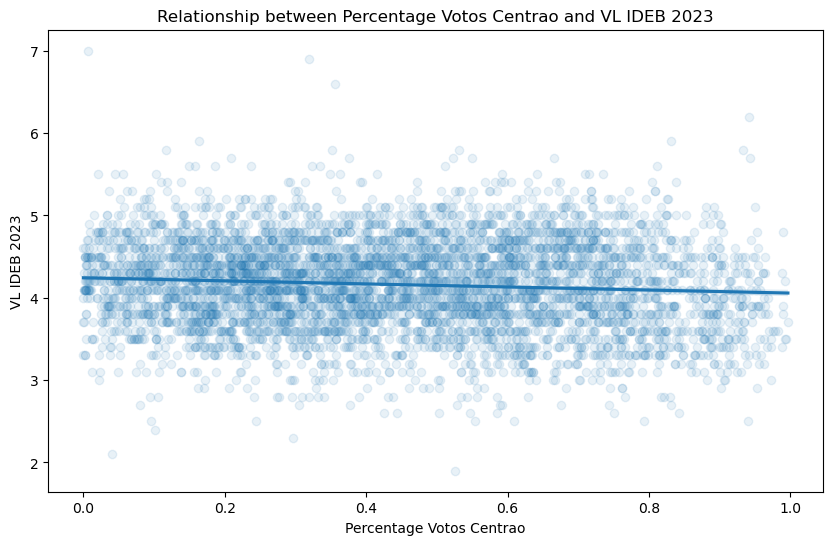

In [67]:
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='percentage_votos_centrao', y='VL_OBSERVADO_2023', data=merged_ideb, scatter_kws={'alpha':0.1})
plt.xlabel('Percentage Votos Centrao')
plt.ylabel('VL IDEB 2023')
plt.title('Relationship between Percentage Votos Centrao and VL IDEB 2023')
plt.show()

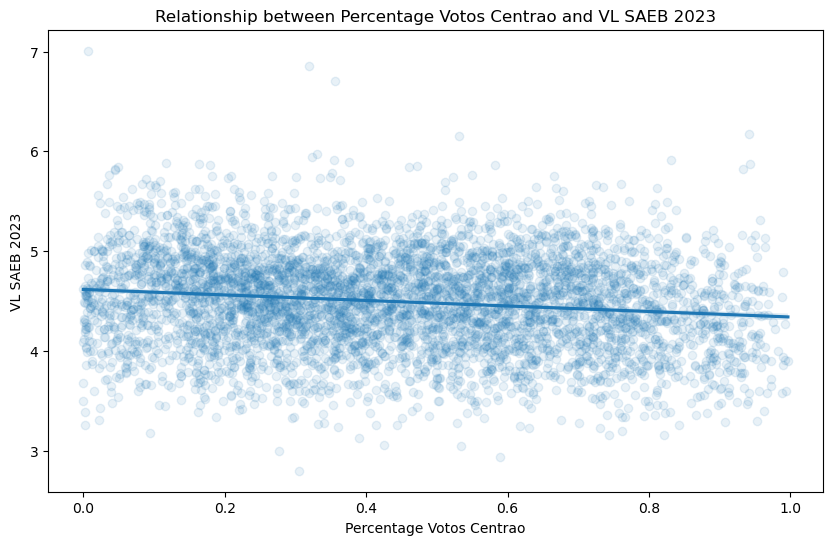

In [69]:
plt.figure(figsize=(10, 6))
sns.regplot(x='percentage_votos_centrao', y='VL_NOTA_MEDIA_2023', data=merged_ideb, scatter_kws={'alpha':0.1})
plt.xlabel('Percentage Votos Centrao')
plt.ylabel('VL SAEB 2023')
plt.title('Relationship between Percentage Votos Centrao and VL SAEB 2023')
plt.show()

## Privada IDEB

In [73]:
ideb_clean_priv = ideb_clean[ideb_clean['REDE'] == 'Privada']
merged_ideb_priv = votos_centrao.merge(ideb_clean_pub, left_on='ibge', right_on='CO_MUNICIPIO')

In [74]:
merged_ideb_priv

,Unnamed: 0,regiao,ibge,municipio,pib_per_capita,uf,vab,Impostos,populacao,taxa_analfabetismo,percentage_votos_centrao,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_NOTA_MEDIA_2023,VL_OBSERVADO_2023
0,0,Norte,1100015,Alta Floresta D'Oeste,32619.88,RO,"Administração, defesa, educação e saúde públic...",4.959640e+04,2.251600e+04,8.41,NaN,RO,1100015,Alta Floresta D'Oeste,Pública,4.644526,4.5
1,1,Norte,1100023,Ariquemes,28878.27,RO,Demais serviços,4.201954e+05,1.111480e+05,5.92,0.746897,RO,1100023,Ariquemes,Pública,4.620059,4.2
2,2,Norte,1100031,Cabixi,47051.83,RO,"Agricultura, inclusive apoio à agricultura e a...",1.119268e+04,5.067000e+03,10.18,0.368494,RO,1100031,Cabixi,Pública,4.212595,4.1
3,3,Norte,1100049,Cacoal,32313.26,RO,Demais serviços,3.846066e+05,8.641600e+04,6.29,0.125420,RO,1100049,Cacoal,Pública,4.507969,4.2
4,4,Norte,1100056,Cerejeiras,46185.81,RO,Comércio e reparação de veículos automotores e...,1.319039e+05,1.608800e+04,7.85,0.259368,RO,1100056,Cerejeiras,Pública,4.635988,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,5564,Centro-oeste,5222005,Vianópolis,60900.61,GO,"Agricultura, inclusive apoio à agricultura e a...",6.605620e+04,1.408800e+04,6.55,0.719274,GO,5222005,Vianópolis,Pública,5.145802,5.1
5554,5565,Centro-oeste,5222054,Vicentinópolis,53340.72,GO,"Agricultura, inclusive apoio à agricultura e a...",3.189978e+04,9.002000e+03,9.13,0.591141,GO,5222054,Vicentinópolis,Pública,4.742368,4.7
5555,5566,Centro-oeste,5222203,Vila Boa,27886.97,GO,"Agricultura, inclusive apoio à agricultura e a...",1.419232e+04,6.451000e+03,12.83,0.263485,GO,5222203,Vila Boa,Pública,4.872678,4.9
5556,5567,Centro-oeste,5222302,Vila Propício,51845.31,GO,"Agricultura, inclusive apoio à agricultura e a...",1.286475e+04,5.941000e+03,14.32,0.585609,GO,5222302,Vila Propício,Pública,4.437978,4.4


In [76]:
merged_ideb_priv['percentage_votos_centrao'].corr(merged_ideb['VL_OBSERVADO_2023']), merged_ideb_priv['percentage_votos_centrao'].corr(merged_ideb['VL_NOTA_MEDIA_2023'])

(-0.08468043464116996, -0.1432861844749356)

In [78]:
from scipy.stats import spearmanr


# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb_priv['percentage_votos_centrao'], merged_ideb_priv['VL_OBSERVADO_2023'], nan_policy='omit')

print(f'Spearman correlation IDEB: {corr}, p-value: {p_value}')

Spearman correlation IDEB: -0.07665850871588419, p-value: 5.637892703393228e-08


In [80]:
# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb_priv['percentage_votos_centrao'], merged_ideb_priv['VL_NOTA_MEDIA_2023'], nan_policy='omit')

print(f'Spearman correlation SAEB: {corr}, p-value: {p_value}')

Spearman correlation SAEB: -0.13550887406924628, p-value: 6.045350084975845e-22


In [81]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb_priv.groupby('SG_UF').apply(lambda x: spearmanr(x['VL_OBSERVADO_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(state_correlations_df.sort_values(by='p_value'))

       correlation   p_value
SG_UF                       
SP       -0.132673  0.001113
MT        0.224758  0.011071
SC       -0.181713  0.012811
PI       -0.166720  0.015092
RJ        0.217561  0.040555
TO        0.162156  0.062211
CE        0.129528  0.079702
MG       -0.062891  0.079971
AP       -0.419314  0.153791
MS        0.187067  0.159696
RN       -0.114136  0.208749
AM        0.133325  0.305675
PE       -0.075204  0.311631
BA        0.038663  0.437767
MA        0.044361  0.527657
GO        0.033839  0.612041
AC        0.097693  0.681992
PR       -0.019468  0.705215
AL        0.037429  0.721696
PB        0.024605  0.725553
RO       -0.042075  0.786252
ES        0.029990  0.801145
PA       -0.017569  0.836771
RR        0.047159  0.878411
RS       -0.005538  0.914091
SE       -0.011248  0.926912
DF             NaN       NaN


In [82]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb_priv.groupby('SG_UF').apply(lambda x: spearmanr(x['VL_NOTA_MEDIA_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(round(state_correlations_df.sort_values(by='p_value'), 4))

       correlation  p_value
SG_UF                      
SC         -0.3697   0.0000
MG         -0.1679   0.0000
RN         -0.3595   0.0000
SP         -0.1352   0.0009
MT          0.2054   0.0205
PI         -0.1451   0.0347
TO          0.1687   0.0522
AL          0.1792   0.0857
SE          0.1778   0.1439
CE          0.0889   0.2303
RO         -0.1786   0.2461
RJ          0.1184   0.2693
PE         -0.0816   0.2720
AP         -0.3187   0.2886
RS         -0.0515   0.3156
MS         -0.1290   0.3343
AM          0.0922   0.4799
PA         -0.0449   0.5980
GO          0.0264   0.6921
PR          0.0194   0.7064
MA          0.0236   0.7370
ES         -0.0395   0.7403
PB          0.0216   0.7582
BA          0.0070   0.8881
AC          0.0331   0.8899
RR          0.0385   0.9007
DF             NaN      NaN


In [83]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb_priv.groupby('regiao').apply(lambda x: spearmanr(x['VL_OBSERVADO_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Display the correlations
print(regiao_correlations)

regiao
Centro-oeste      (0.4468702939855832, 1.1473188977933892e-21)
Nordeste        (-0.16892044809077753, 3.1997728135518775e-12)
Norte             (-0.2226863670458951, 3.654506059253918e-06)
Sudeste          (-0.16540130837021239, 6.645343101993443e-11)
Sul              (0.25552820648044094, 1.3012811776916963e-15)
dtype: object


In [84]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb_priv.groupby('regiao').apply(lambda x: spearmanr(x['VL_NOTA_MEDIA_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Display the correlations
print(regiao_correlations)

regiao
Centro-oeste     (0.3772323407711888, 2.0512037634033475e-15)
Nordeste        (-0.09556316046729638, 8.745694906153532e-05)
Norte             (-0.11537236010421832, 0.01747349269321923)
Sudeste          (-0.1901150091706704, 5.441652762968326e-14)
Sul             (-0.14627382236921083, 6.053669842715743e-06)
dtype: object


## IDEB Progression

In [98]:
merged_ideb['IDEB 2023/2017'] = merged_ideb['VL_OBSERVADO_2023']/merged_ideb['VL_OBSERVADO_2017']
merged_ideb['SAEB 2023/2017'] = merged_ideb['VL_NOTA_MEDIA_2023'] / merged_ideb['VL_NOTA_MEDIA_2017']



In [99]:
from scipy.stats import spearmanr


# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['IDEB 2023/2017'], nan_policy='omit')

print(f'Spearman correlation IDEB: {corr}, p-value: {p_value}')

Spearman correlation IDEB: 0.039415839025213006, p-value: 0.006208482299491318


In [100]:
from scipy.stats import spearmanr


# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['SAEB 2023/2017'], nan_policy='omit')

print(f'Spearman correlation SAEB: {corr}, p-value: {p_value}')

Spearman correlation SAEB: 0.06772467384881758, p-value: 2.53165452063366e-06


In [101]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb.groupby('SG_UF').apply(lambda x: spearmanr(x['IDEB 2023/2017'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(state_correlations_df.sort_values(by='p_value'))

       correlation   p_value
SG_UF                       
PA       -0.231557  0.006887
RJ        0.280774  0.008433
TO        0.182410  0.035601
SC        0.179365  0.035974
ES        0.214420  0.070503
SP       -0.068020  0.097393
PB       -0.084408  0.231174
PE       -0.079967  0.283228
PI        0.075057  0.287192
MT        0.080314  0.395637
RO       -0.108243  0.484305
BA        0.034676  0.489214
GO       -0.042382  0.525226
RS        0.031210  0.568036
CE        0.041545  0.575519
PR       -0.028879  0.581834
AC        0.137397  0.586671
MS        0.064634  0.632887
AL        0.042955  0.682664
AP        0.136364  0.689309
RR        0.166667  0.693239
AM       -0.043120  0.743565
RN       -0.028165  0.768154
MA       -0.003880  0.956076
MG       -0.001617  0.964314
SE       -0.000802  0.994823
DF             NaN       NaN


In [102]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb.groupby('regiao').apply(lambda x: spearmanr(x['SAEB 2023/2017'], x['percentage_votos_centrao'], nan_policy='omit'))

regiaos_correlations_df = pd.DataFrame(regiao_correlations.tolist(), index=regiao_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations
print(round(regiaos_correlations_df, 3))

              correlation  p_value
regiao                            
Centro-oeste        0.086    0.088
Nordeste           -0.014    0.565
Norte              -0.025    0.610
Sudeste             0.008    0.748
Sul                 0.207    0.000


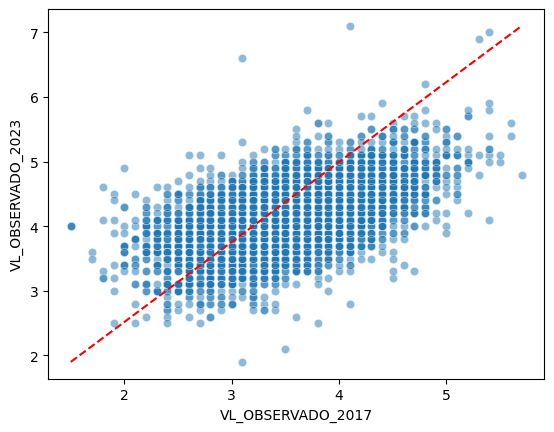

In [109]:
import seaborn as sns

sns.scatterplot(x=merged_ideb['VL_OBSERVADO_2017'], y=merged_ideb['VL_OBSERVADO_2023'], alpha=0.5)
plt.plot([merged_ideb['VL_OBSERVADO_2017'].min(), merged_ideb['VL_OBSERVADO_2017'].max()], 
         [merged_ideb['VL_OBSERVADO_2023'].min(), merged_ideb['VL_OBSERVADO_2023'].max()], 
         color='red', linestyle='--')
plt.show()

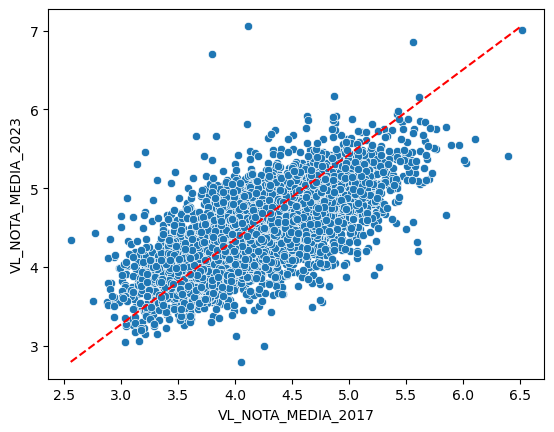

In [110]:
import seaborn as sns

sns.scatterplot(x=merged_ideb['VL_NOTA_MEDIA_2017'], y=merged_ideb['VL_NOTA_MEDIA_2023'])
plt.plot([merged_ideb['VL_NOTA_MEDIA_2017'].min(), merged_ideb['VL_NOTA_MEDIA_2017'].max()], 
         [merged_ideb['VL_NOTA_MEDIA_2023'].min(), merged_ideb['VL_NOTA_MEDIA_2023'].max()], 
         color='red', linestyle='--')
plt.show()

In [111]:
merged_ideb

,Unnamed: 0,regiao,ibge,municipio,pib_per_capita,uf,vab,Impostos,populacao,taxa_analfabetismo,...,VL_NOTA_MEDIA_2023,VL_OBSERVADO_2023,VL_OBSERVADO_2021,VL_OBSERVADO_2019,VL_OBSERVADO_2017,VL_NOTA_MEDIA_2021,VL_NOTA_MEDIA_2019,VL_NOTA_MEDIA_2017,IDEB 2023/2017,SAEB 2023/2017
0,0,Norte,1100015,Alta Floresta D'Oeste,32619.88,RO,"Administração, defesa, educação e saúde públic...",4.959640e+04,2.251600e+04,8.41,...,4.644526,4.5,3.9,4.5,3.9,4.326666,4.863751,4.379528,1.153846,1.060508
1,1,Norte,1100023,Ariquemes,28878.27,RO,Demais serviços,4.201954e+05,1.111480e+05,5.92,...,4.620059,4.2,3.9,4.0,3.8,4.437153,4.775508,4.491160,1.105263,1.028701
2,2,Norte,1100031,Cabixi,47051.83,RO,"Agricultura, inclusive apoio à agricultura e a...",1.119268e+04,5.067000e+03,10.18,...,4.212595,4.1,4.1,NaN,3.7,4.283235,NaN,3.862733,1.108108,1.090574
3,3,Norte,1100049,Cacoal,32313.26,RO,Demais serviços,3.846066e+05,8.641600e+04,6.29,...,4.507969,4.2,4.2,4.4,3.9,4.508396,4.831159,4.250359,1.076923,1.060609
4,4,Norte,1100056,Cerejeiras,46185.81,RO,Comércio e reparação de veículos automotores e...,1.319039e+05,1.608800e+04,7.85,...,4.635988,4.1,NaN,4.6,3.8,NaN,4.986536,4.698697,1.078947,0.986654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,5564,Centro-oeste,5222005,Vianópolis,60900.61,GO,"Agricultura, inclusive apoio à agricultura e a...",6.605620e+04,1.408800e+04,6.55,...,5.145802,5.1,4.5,5.4,4.7,4.667125,5.574786,5.027023,1.085106,1.023628
5554,5565,Centro-oeste,5222054,Vicentinópolis,53340.72,GO,"Agricultura, inclusive apoio à agricultura e a...",3.189978e+04,9.002000e+03,9.13,...,4.742368,4.7,4.6,5.1,4.9,4.599633,5.153322,4.968629,0.959184,0.954462
5555,5566,Centro-oeste,5222203,Vila Boa,27886.97,GO,"Agricultura, inclusive apoio à agricultura e a...",1.419232e+04,6.451000e+03,12.83,...,4.872678,4.9,4.0,4.2,3.7,3.996643,4.241835,3.819199,1.324324,1.275838
5556,5567,Centro-oeste,5222302,Vila Propício,51845.31,GO,"Agricultura, inclusive apoio à agricultura e a...",1.286475e+04,5.941000e+03,14.32,...,4.437978,4.4,4.6,4.4,4.5,4.629550,4.520494,4.549669,0.977778,0.975451


c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


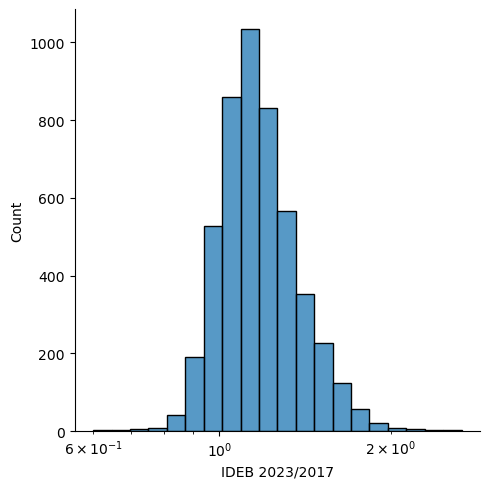

In [130]:
sns.displot(merged_ideb['IDEB 2023/2017'], bins=20, kde=False, log_scale=True)

In [125]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = "BR_Municipios_2022/BR_Municipios_2022.shp"
gdf = gpd.read_file(shapefile_path)

shape_uf = "BR_UF_2022/BR_UF_2022.shp"
gdf_uf = gpd.read_file(shape_uf)


# Merge the shapefile with the merged dataframe
gdf['CD_MUN'] = gdf['CD_MUN'].astype(int)


In [127]:
gdf = gdf.merge(merged_ideb, left_on="CD_MUN", right_on="ibge")

In [129]:
gdf.describe(include='all')

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Unnamed: 0,regiao,ibge,municipio,pib_per_capita,...,VL_NOTA_MEDIA_2023,VL_OBSERVADO_2023,VL_OBSERVADO_2021,VL_OBSERVADO_2019,VL_OBSERVADO_2017,VL_NOTA_MEDIA_2021,VL_NOTA_MEDIA_2019,VL_NOTA_MEDIA_2017,IDEB 2023/2017,SAEB 2023/2017
count,5558.0,5558,5558,5558.000000,5558,5558.000000,5558,5558.0,5558,5558.000000,...,5064.000000,5064.000000,3376.000000,4773.000000,5277.000000,3376.000000,4773.000000,5277.000000,4872.000000,4872.000000
unique,5558.0,5286,27,NaN,5558,NaN,5,5558.0,5286,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1100015.0,São Domingos,MG,NaN,"POLYGON ((-62.0080637729999 -12.1337851349999,...",NaN,Nordeste,1100015.0,São Domingos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1.0,5,852,NaN,1,NaN,1789,1.0,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1526.288332,NaN,2784.787693,NaN,NaN,NaN,33848.229142,...,4.491906,4.160545,4.176303,4.031154,3.569774,4.477412,4.591070,4.257745,1.190503,1.062068
std,NaN,NaN,NaN,5610.213499,NaN,1607.546797,NaN,NaN,NaN,41891.117222,...,0.475597,0.541495,0.615952,0.664849,0.653965,0.512196,0.552333,0.543760,0.201588,0.101790
min,NaN,NaN,NaN,3.565000,NaN,0.000000,NaN,NaN,NaN,5407.660000,...,2.797700,1.900000,1.300000,1.700000,1.500000,2.827480,2.236053,2.555209,0.600000,0.691030
25%,NaN,NaN,NaN,204.904000,NaN,1392.250000,NaN,NaN,NaN,12829.090000,...,4.168081,3.800000,3.800000,3.600000,3.100000,4.133650,4.210078,3.862733,1.054054,0.997226
50%,NaN,NaN,NaN,417.976500,NaN,2785.500000,NaN,NaN,NaN,23361.540000,...,4.503858,4.200000,4.300000,4.100000,3.600000,4.504084,4.628034,4.275652,1.153846,1.051672
75%,NaN,NaN,NaN,1026.610000,NaN,4175.750000,NaN,NaN,NaN,40807.450000,...,4.811302,4.500000,4.600000,4.500000,4.000000,4.833964,4.983123,4.639134,1.285714,1.118088


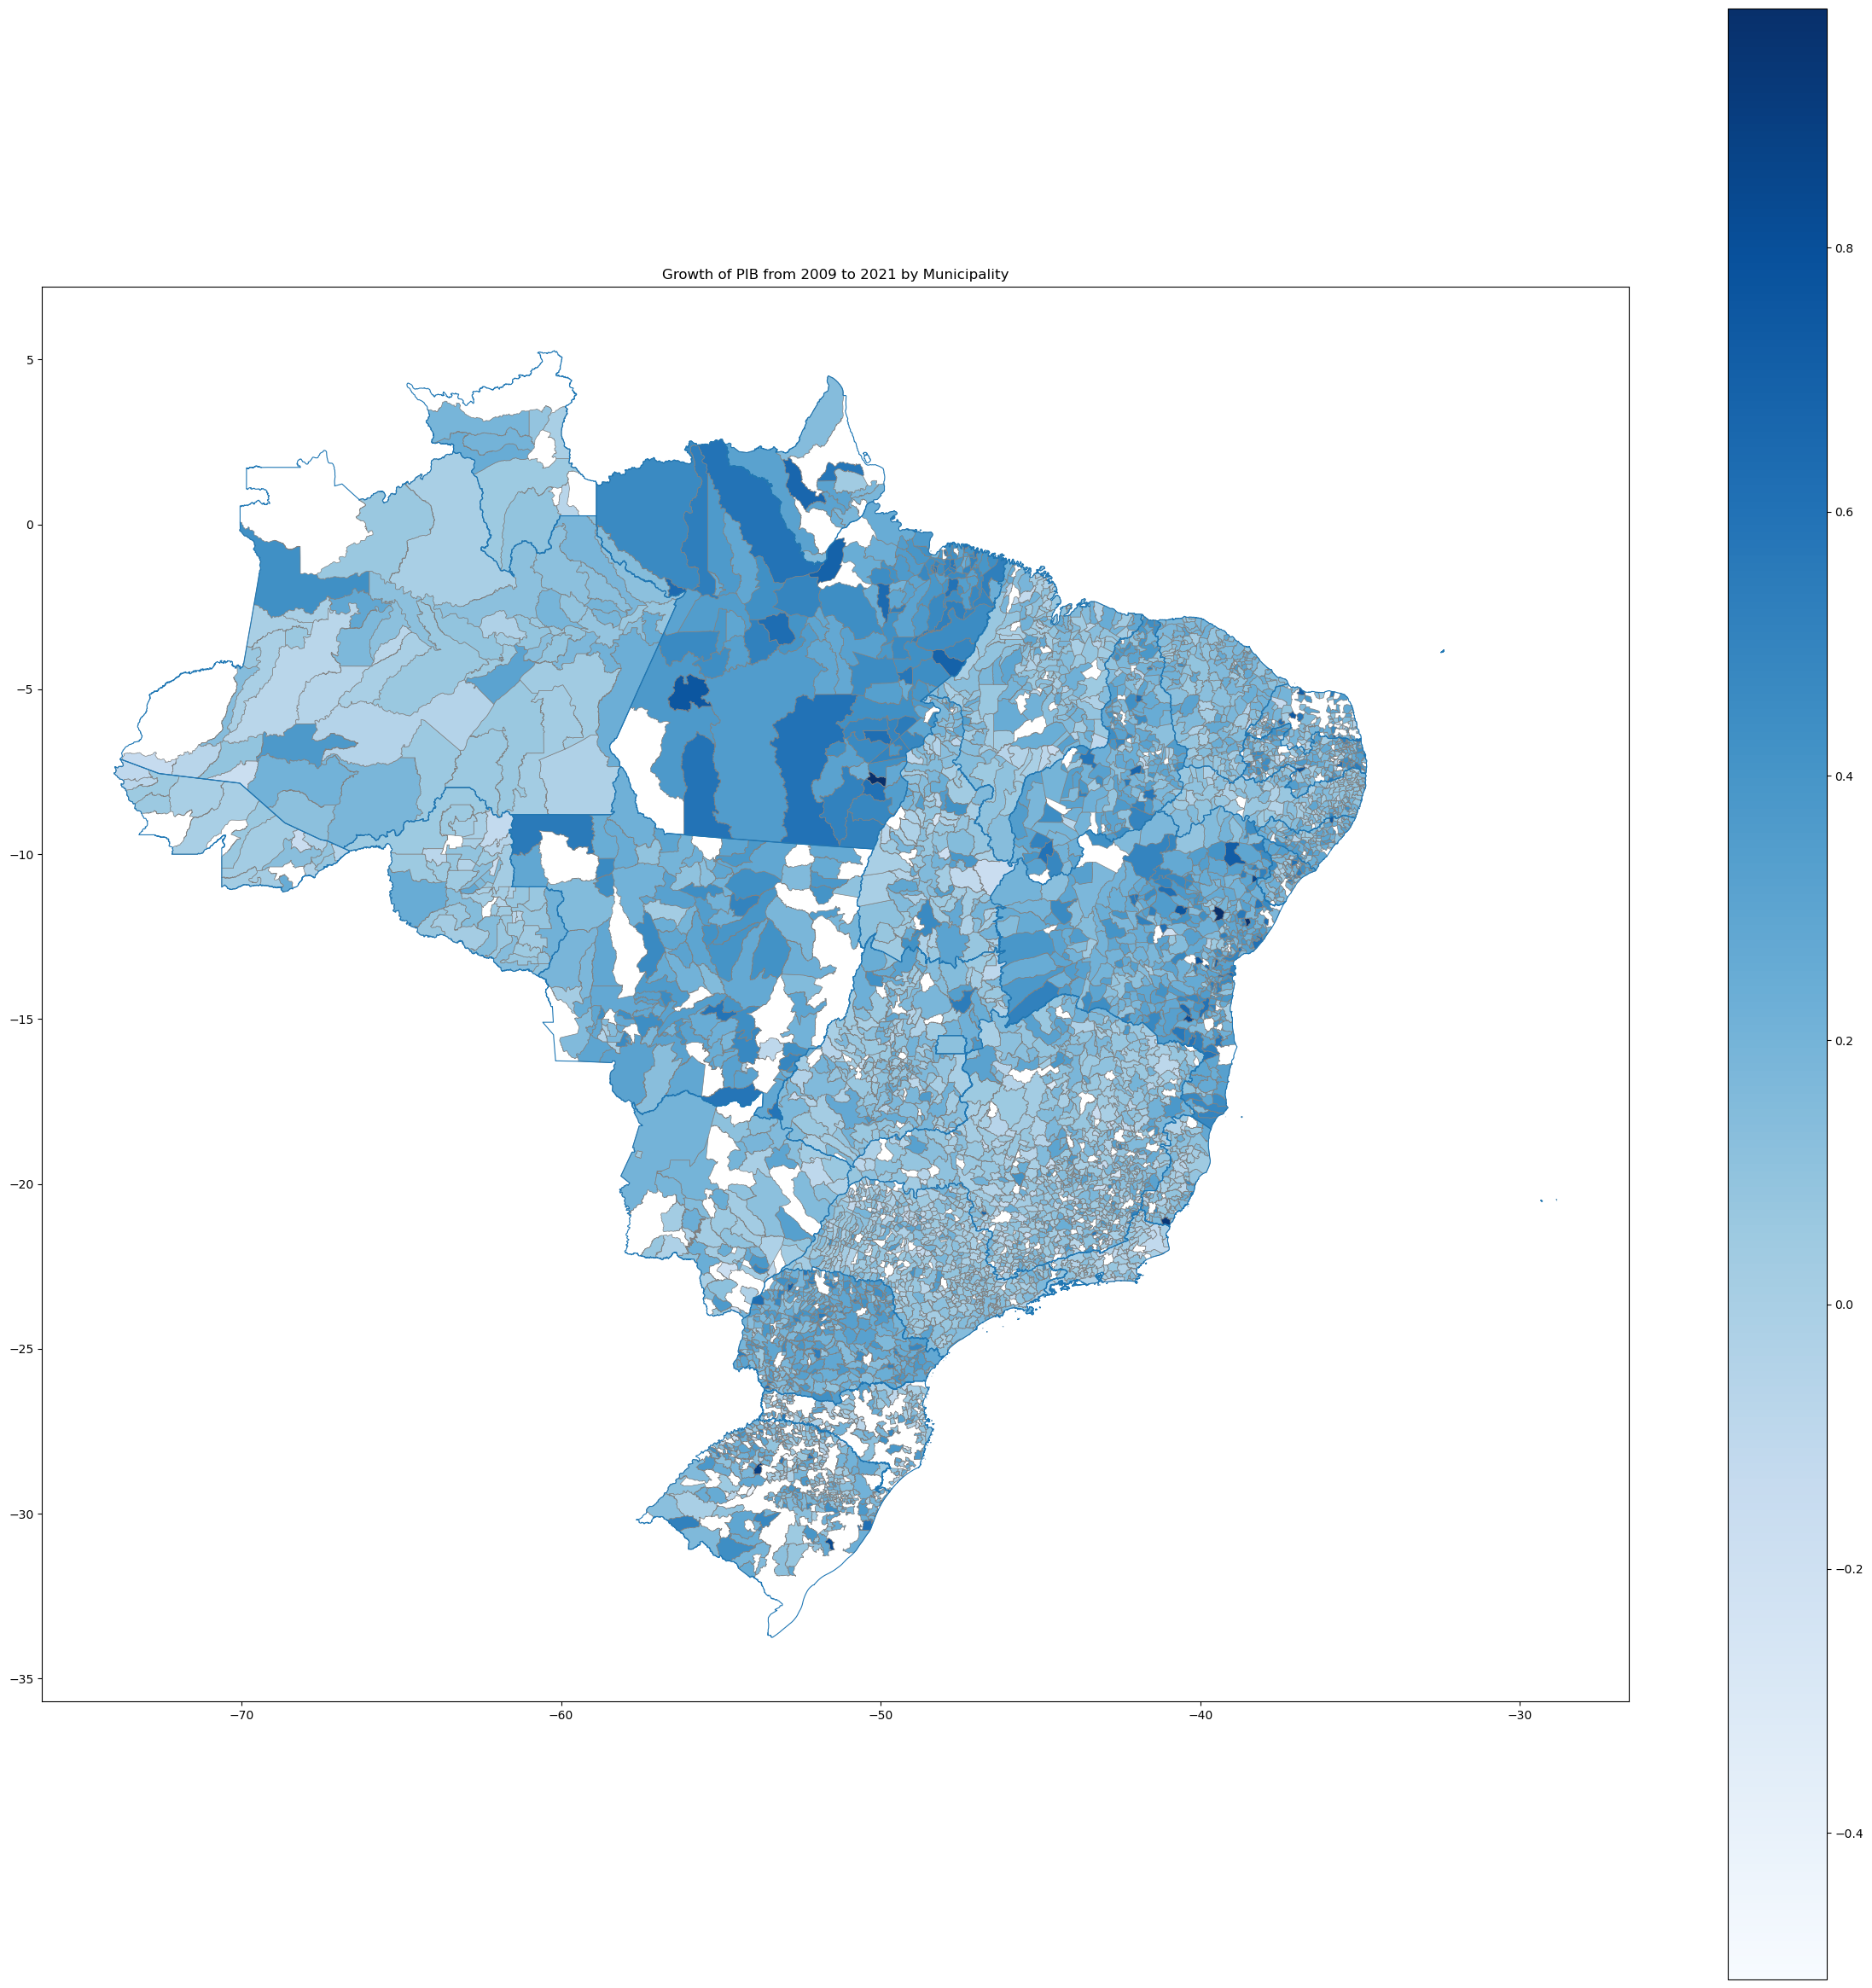

In [131]:

gdf['log IDEB ratio'] = np.log(gdf['IDEB 2023/2017'])
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
gdf.plot(column='log IDEB ratio', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.5', legend=True)
gdf_uf.boundary.plot(ax=ax, linewidth=0.8)
plt.title('Growth of PIB from 2009 to 2021 by Municipality')
plt.show()